In [1]:
import pandas as pd
import numpy as np

In [2]:
hms = pd.read_csv("HMS_2023-2024_sleep.csv")

/var/folders/tf/t9t14sq56tq7k5310hms5l2r0000gn/T/ipykernel_1043/1786604539.py:1: DtypeWarning: Columns (12,23,38,44,51,64,109,113,161,170,234,300,348,356,364,370,376,384,392,405,410,523,529,536,540,571,608,641,688,699,712,721,731,790,872,940,970,999,1064,1081,1094,1109,1134,1147,1154,1162,1164,1231,1238,1248,1249,1314,1328,1342,1350,1375,1435,1437,1526,1538) have mixed types. Specify dtype option on import or set low_memory=False.
  hms = pd.read_csv("HMS_2023-2024_sleep.csv")


In [3]:
hms.head()

StartDate        RecordedDate         responseid   age  sex_birth  \
0  16nov2023 22:51:41  05dec2023 08:17:37  R_006AKYXyGhT9Upb  18.0        1.0   
1  16nov2023 17:12:11  16nov2023 17:37:33  R_006rfKhxwocpzmF  18.0        1.0   
2  24sep2023 18:29:45  24sep2023 18:53:25  R_009nvDs0qZwqoW5  18.0        2.0   
3  30oct2023 08:01:53  21nov2023 07:17:23  R_00R9rAHb09Ydma5  20.0        1.0   
4  24oct2023 09:49:54  21nov2023 07:57:58  R_00SNQFMZ5Kok7Hr  21.0        2.0   

   gender_male  gender_female  gender_queer  gender_nonbin  gender_trans  ...  \
0          NaN            1.0           NaN            NaN           NaN  ...   
1          NaN            1.0           NaN            NaN           NaN  ...   
2          1.0            NaN           NaN            NaN           NaN  ...   
3          NaN            1.0           NaN            NaN           NaN  ...   
4          1.0            NaN           NaN            NaN           NaN  ...   

   inst_public  inst_geo inst_specart  inst_speccc  inst_gradrate  inst_msi  \
0            1         8            0            0           0.25         0   
1            1         8            0            0           0.25         0   
2            1         5            0            0           0.50         0   
3            1         3            0            0           0.24         0   
4            0         5            0            0           0.57         0   

   peercohort    Random  sleep_wknight  sleep_wkend  
0         3.0  0.719747            NaN          NaN  
1         3.0  0.219248            7.0          6.0  
2         3.0  0.756233            NaN          NaN  
3         3.0  0.133426            6.0          8.0  
4         1.0  0.773790            NaN          NaN  

[5 rows x 1556 columns]

In [4]:
columns = ["age", "fincur", "housing_worry", "pellgrant", "degree_bach", "activ_ac", "activ_athv", 
           "activ_athc", "activ_athi", "activ_cs", "activ_cu", "activ_da", "activ_fs", "activ_gs"]

columns_cont = ["activ_gov", "activ_hw", "activ_mp",	"activ_md",	"activ_rel", "activ_soc", "activ_art", 
                "activ_hon",	"activ_advoc", "activ_other", "activ_none"]

columns_academic = ["covid_clsformat", "yr_sch", "enroll"]

columns_majors = ["field_hum", "field_nat", "field_soc", "field_arc", "field_art", "field_bus", "field_den", 
                  "field_ed", "field_eng", "field_law", "field_med", "field_mus", "field_nur", "field_pharm", 
                  "field_prep", "field_ph", "field_pp", "field_sw", "field_und", "field_other", "field_other_text"]

#For tech schools only 
column_tech_major = [
    'field_hum', 'field_nat', 'field_soc', 'field_arc', 'field_elec', 'field_bus', 
    'field_den', 'field_ed', 'field_weld', 'field_auto', 'field_hvac', 'field_heal', 
    'field_nur', 'field_cul', 'field_rob', 'field_crim', 'field_vet', 'field_hosp', 
    'field_eng', 'field_comp', 'field_plum', 'field_other_tech'
]

column_grades = [
    'gr_A', 'gr_B', 'gr_C', 'gr_D', 'gr_F', 'gr_none', 'gr_dk'
]

column_mental_etc = ["mh_prior_demo", "aca_impa", "flourish", "deprawsc", "anx_score"]

column_phq_anx = ['phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7', 'phq9_8', 'phq9_9', 'dep_impa',
    'gad7_1', 'gad7_2', 'gad7_3', 'gad7_4', 'gad7_5', 'gad7_6', 'gad7_7', 'gad7_impa']

columns_more = ["ed_scoff", "aca_impa", "sui_idea", "sui_plan", "sui_att", "lonesc", "lone_lackcompanion",
                "lone_leftout", "lone_isolated", "exerc", "sleep_wknight", "sleep_wkend", "dx_any",
                "dx_dep", "dx_bip", "dx_anx", "dx_ocd",	"dx_trauma", "dx_neurodev",	"dx_ea", "dx_psy", "dx_pers",
                "dx_sa", "dx_none",	"dx_dk"]

columns_1 =  ["knowwher_dich", "percneed", "ther_vis", "ther_any", "inf_1", "inf_2", "inf_3", "inf_4", "inf_5",
              "inf_6", "inf_9", "inf_10", "inf_7", "inf_8", "camp_supp", "stig_per_2", "stig_t_m", "stig_t_I",
              "stig_self_1", "stig_self_2", "stig_self_3", "pay_worry", "sp_time", "StudAthlete"]

columns_id = ["responseid", "schoolnum"]

In [5]:
# List of columns you want to keep
columns_to_keep = [
    "age","sex_birth", "sleep_wknight", "sleep_wkend", "fincur", "housing_worry", "race_black", "race_white","race_ainaan","race_asian", "race_his", "race_pi",
    "race_mides", "race_other","pellgrant", "degree_bach", "activ_ac", "activ_athv", 
    "activ_athc", "activ_athi", "activ_cs", "activ_cu", "activ_da", "activ_fs", "activ_gs",#
    "activ_gov", "activ_hw", "activ_mp", "activ_md", "activ_rel", "activ_soc", "activ_art", 
    "activ_hon", "activ_advoc", "activ_other", "activ_none", "covid_clsformat", "yr_sch", "enroll",
    "field_hum", "field_nat", "field_soc", "field_arc", "field_art", "field_bus", "field_den", 
    "field_ed", "field_eng", "field_law", "field_med", "field_mus", "field_nur", "field_pharm", 
    "field_prep", "field_ph", "field_pp", "field_sw", "field_und", "field_other", "field_other_text", 
    'gr_A', 'gr_B', 'gr_C', 'gr_D', 'gr_F', 'gr_none', 'gr_dk', "mh_prior_demo", "aca_impa", "flourish", 
    "deprawsc", "anx_score", 'phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7', 'phq9_8', 
    'phq9_9', 'dep_impa','gad7_1', 'gad7_2', 'gad7_3', 'gad7_4', 'gad7_5', 'gad7_6', 'gad7_7', 'gad7_impa',"anx_score",
    "ed_scoff", "sui_idea", "sui_plan", "sui_att", "lonesc", "lone_lackcompanion",
    "lone_leftout", "lone_isolated", "exerc", "dx_any","stig_per_2","stig_per_1", "stig_per_3",
    "dx_dep", "dx_bip", "dx_anx", "dx_ocd", "dx_trauma", "dx_neurodev", "dx_ea", "dx_psy", "dx_pers",
    "dx_sa", "dx_none", "dx_dk", "knowwher", "percneed", "ther_vis", "ther_any", "inf_1", "inf_2","stig_serv_1",
    "inf_3", "inf_4", "inf_5", "inf_6", "inf_9", "inf_10", "inf_7", "inf_8", "camp_supp", "stig_pcv_2","stig_pcv_1", "stig_pcv_3", 
    "stig_t_m", "stig_t_I", "stig_self_1", "stig_self_2", "stig_self_3", "pay_worry", "sp_time", "StudAthlete",
    "responseid", "schoolnum"
]

# Filter the DataFrame to only include the columns you want
hms_filtered = hms[columns_to_keep]

In [6]:
hms_filtered.head()

age  sex_birth  sleep_wknight  sleep_wkend  fincur  housing_worry  \
0  18.0        1.0            NaN          NaN     2.0            1.0   
1  18.0        1.0            7.0          6.0     4.0            1.0   
2  18.0        2.0            NaN          NaN     4.0            1.0   
3  20.0        1.0            6.0          8.0     3.0            1.0   
4  21.0        2.0            NaN          NaN     4.0            1.0   

   race_black  race_white  race_ainaan  race_asian  ...  stig_t_m  stig_t_I  \
0         NaN         1.0          NaN         NaN  ...       0.0       0.0   
1         NaN         1.0          NaN         NaN  ...       0.0       0.0   
2         NaN         1.0          NaN         NaN  ...       0.0       0.0   
3         NaN         1.0          NaN         NaN  ...       NaN       NaN   
4         NaN         1.0          NaN         NaN  ...       NaN       NaN   

   stig_self_1  stig_self_2  stig_self_3  pay_worry  sp_time  StudAthlete  \
0          2.0          1.0          1.0        NaN      NaN          Yes   
1          1.0          1.0          1.0        NaN      NaN          Yes   
2          4.0          4.0          3.0        NaN      NaN           No   
3          NaN          NaN          NaN        NaN      NaN          Yes   
4          NaN          NaN          NaN        NaN      NaN          Yes   

          responseid  schoolnum  
0  R_006AKYXyGhT9Upb        106  
1  R_006rfKhxwocpzmF        106  
2  R_009nvDs0qZwqoW5        117  
3  R_00R9rAHb09Ydma5         23  
4  R_00SNQFMZ5Kok7Hr         11  

[5 rows x 145 columns]

In [7]:
null_count = hms_filtered['StudAthlete'].isna().sum()
print(null_count, hms_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104729 entries, 0 to 104728
Columns: 145 entries, age to schoolnum
dtypes: float64(141), int64(1), object(3)
memory usage: 115.9+ MB
107 None


#### Collapse race columns into white and non white

In [9]:
# Define the simplified mapping for categories
race_categories = {
    'race_black': 'non_white',  
    "race_ainaan": 'non_white',
    "race_asian": 'non_white', 
    "race_his": 'non_white',  
    "race_pi": 'non_white',  
     "race_mides": 'non_white',  
    "race_other": 'non_white',  
    "race_white": 'white',
}

# Initialize a dictionary to store the new binary columns
for category in race_categories.values():
    if category not in hms_filtered.columns:
        hms_filtered[category] = 0  # Initially set all to 0
    

# Loop through each row to update the binary columns based on selected race
for index, row in hms_filtered.iterrows():
    # For each race, check if it was selected and set the corresponding category column to 1
    for race, category in race_categories.items():
        if row[race] == 1:
            hms_filtered.at[index, category] = 1 



# Drop the original major fields as we now have expanded columns
race_columns = race_categories.keys()
hms_filtered = hms_filtered.drop(columns=race_columns)

/var/folders/tf/t9t14sq56tq7k5310hms5l2r0000gn/T/ipykernel_1043/1904819567.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hms_filtered[category] = 0  # Initially set all to 0
/var/folders/tf/t9t14sq56tq7k5310hms5l2r0000gn/T/ipykernel_1043/1904819567.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hms_filtered[category] = 0  # Initially set all to 0


In [10]:
hms_filtered.to_csv("filtered_file.csv", index=False)

## Filter data through Kusto

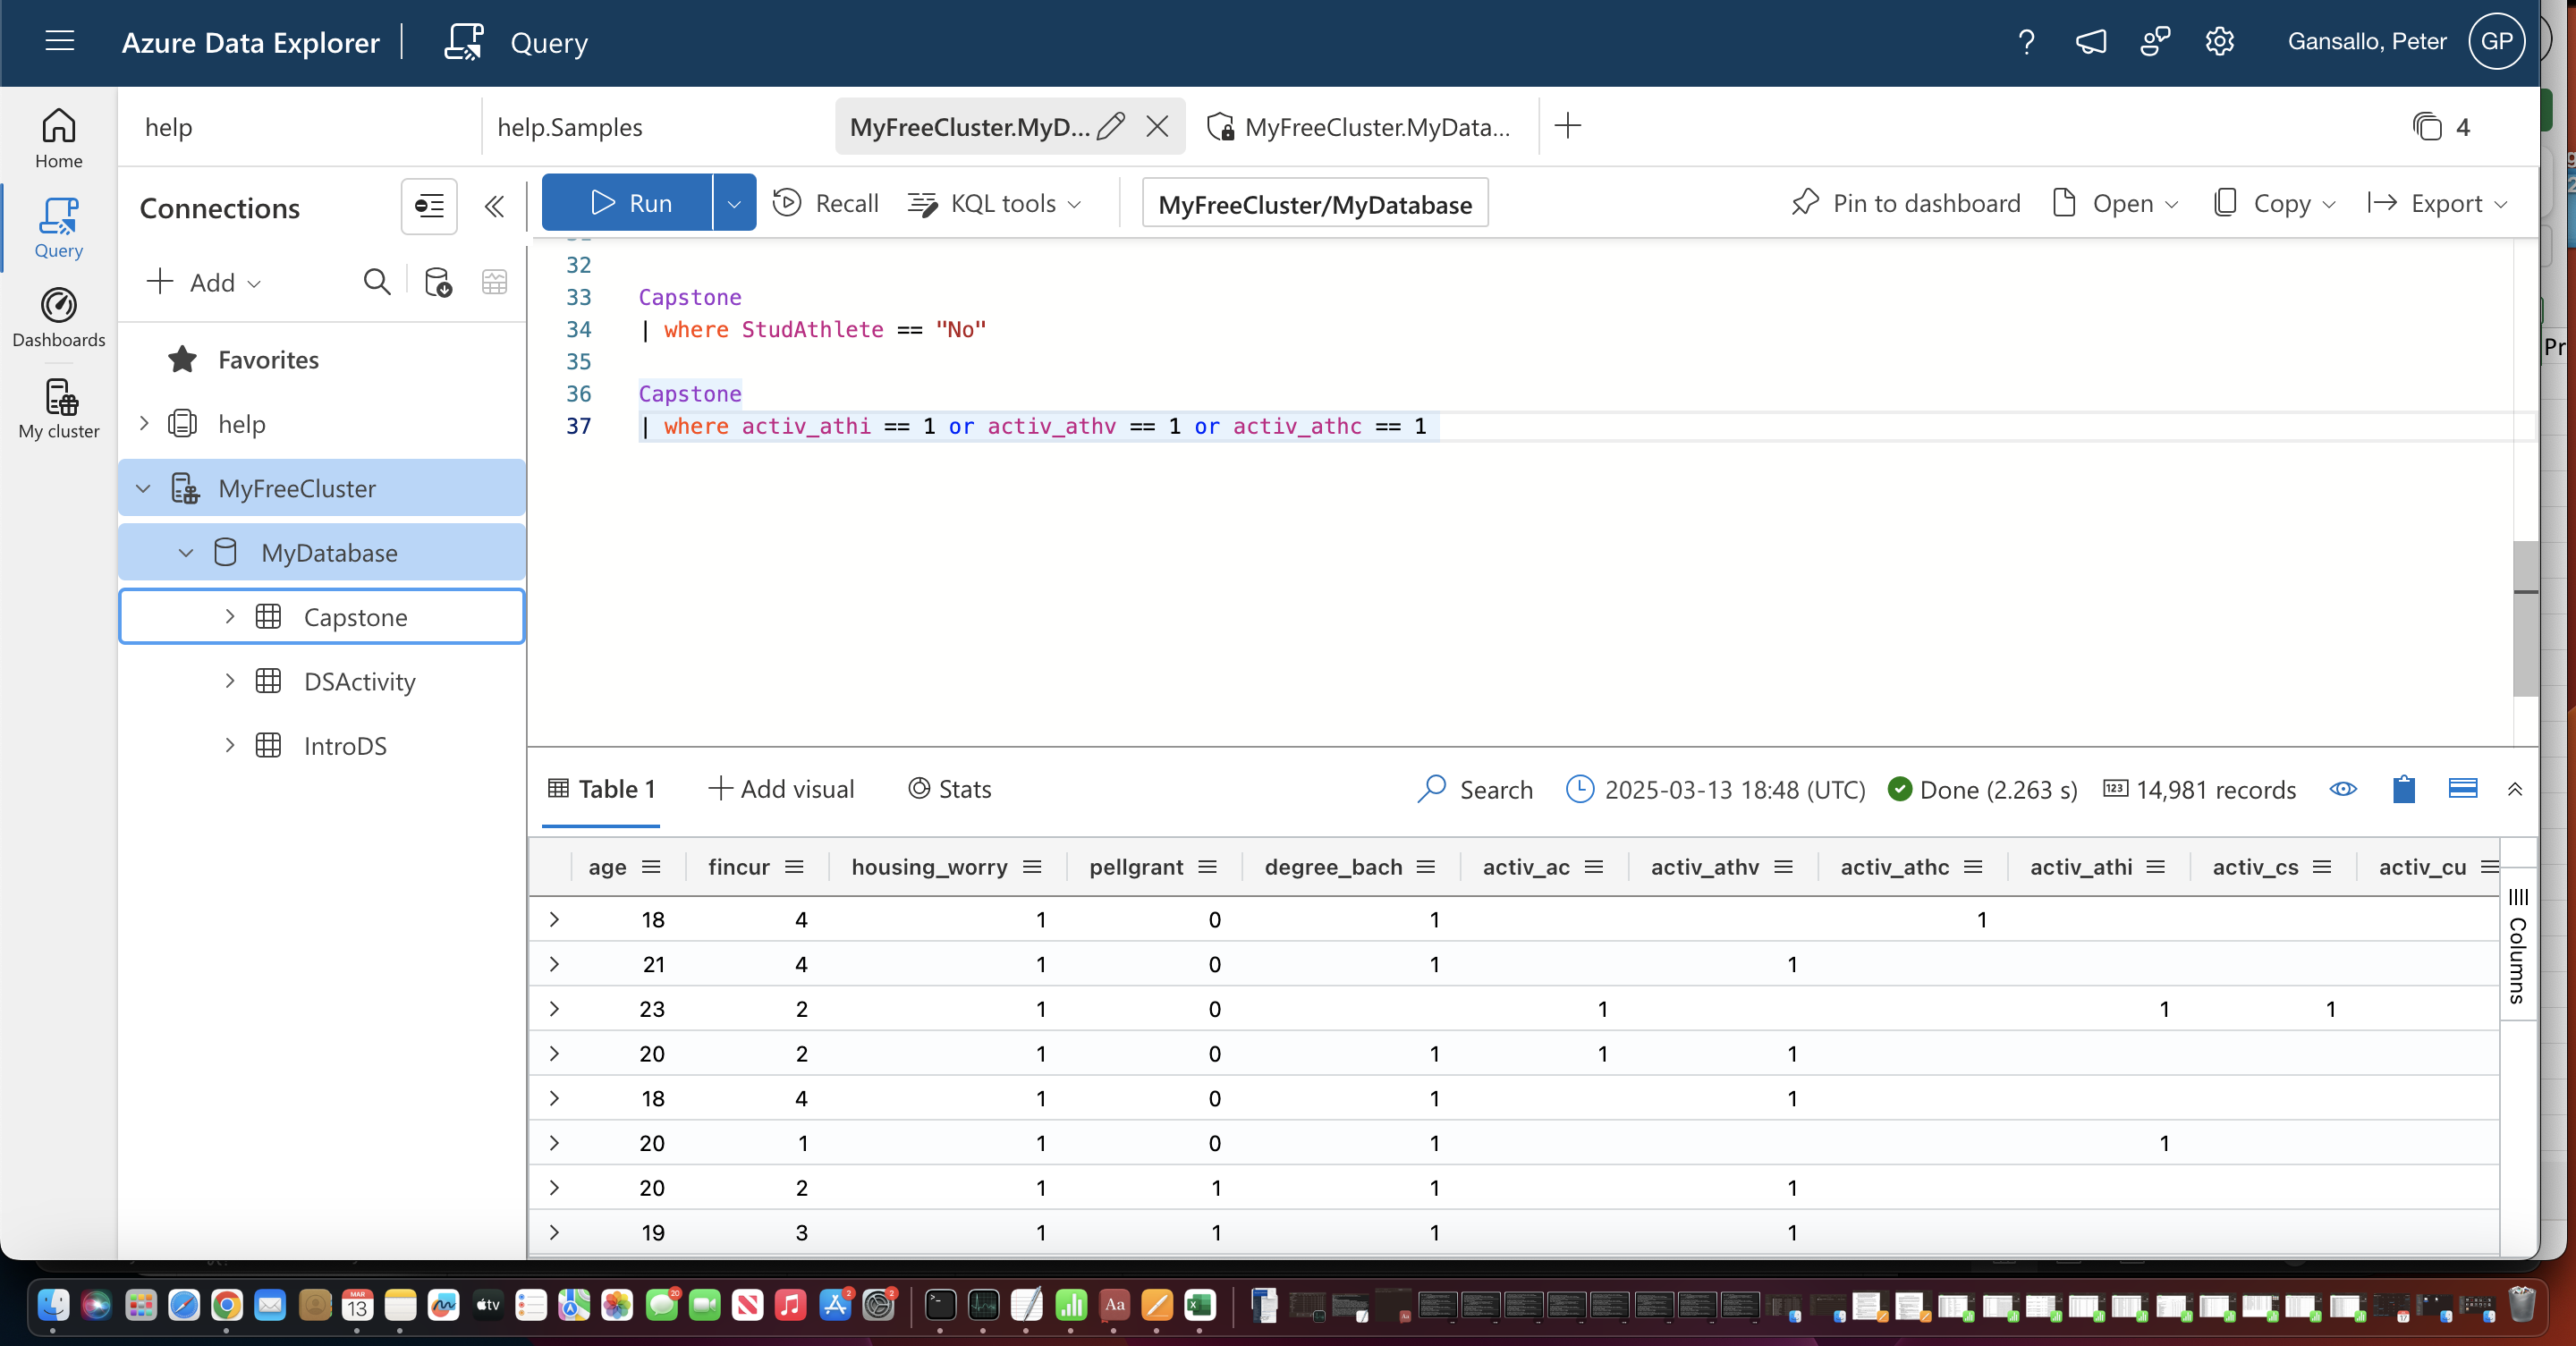

We see if a student is a intramural, club or varsity athlete there are only 15,000 records so I decided to drop all those columns and go with the column that asks if a student is a student athlete or not

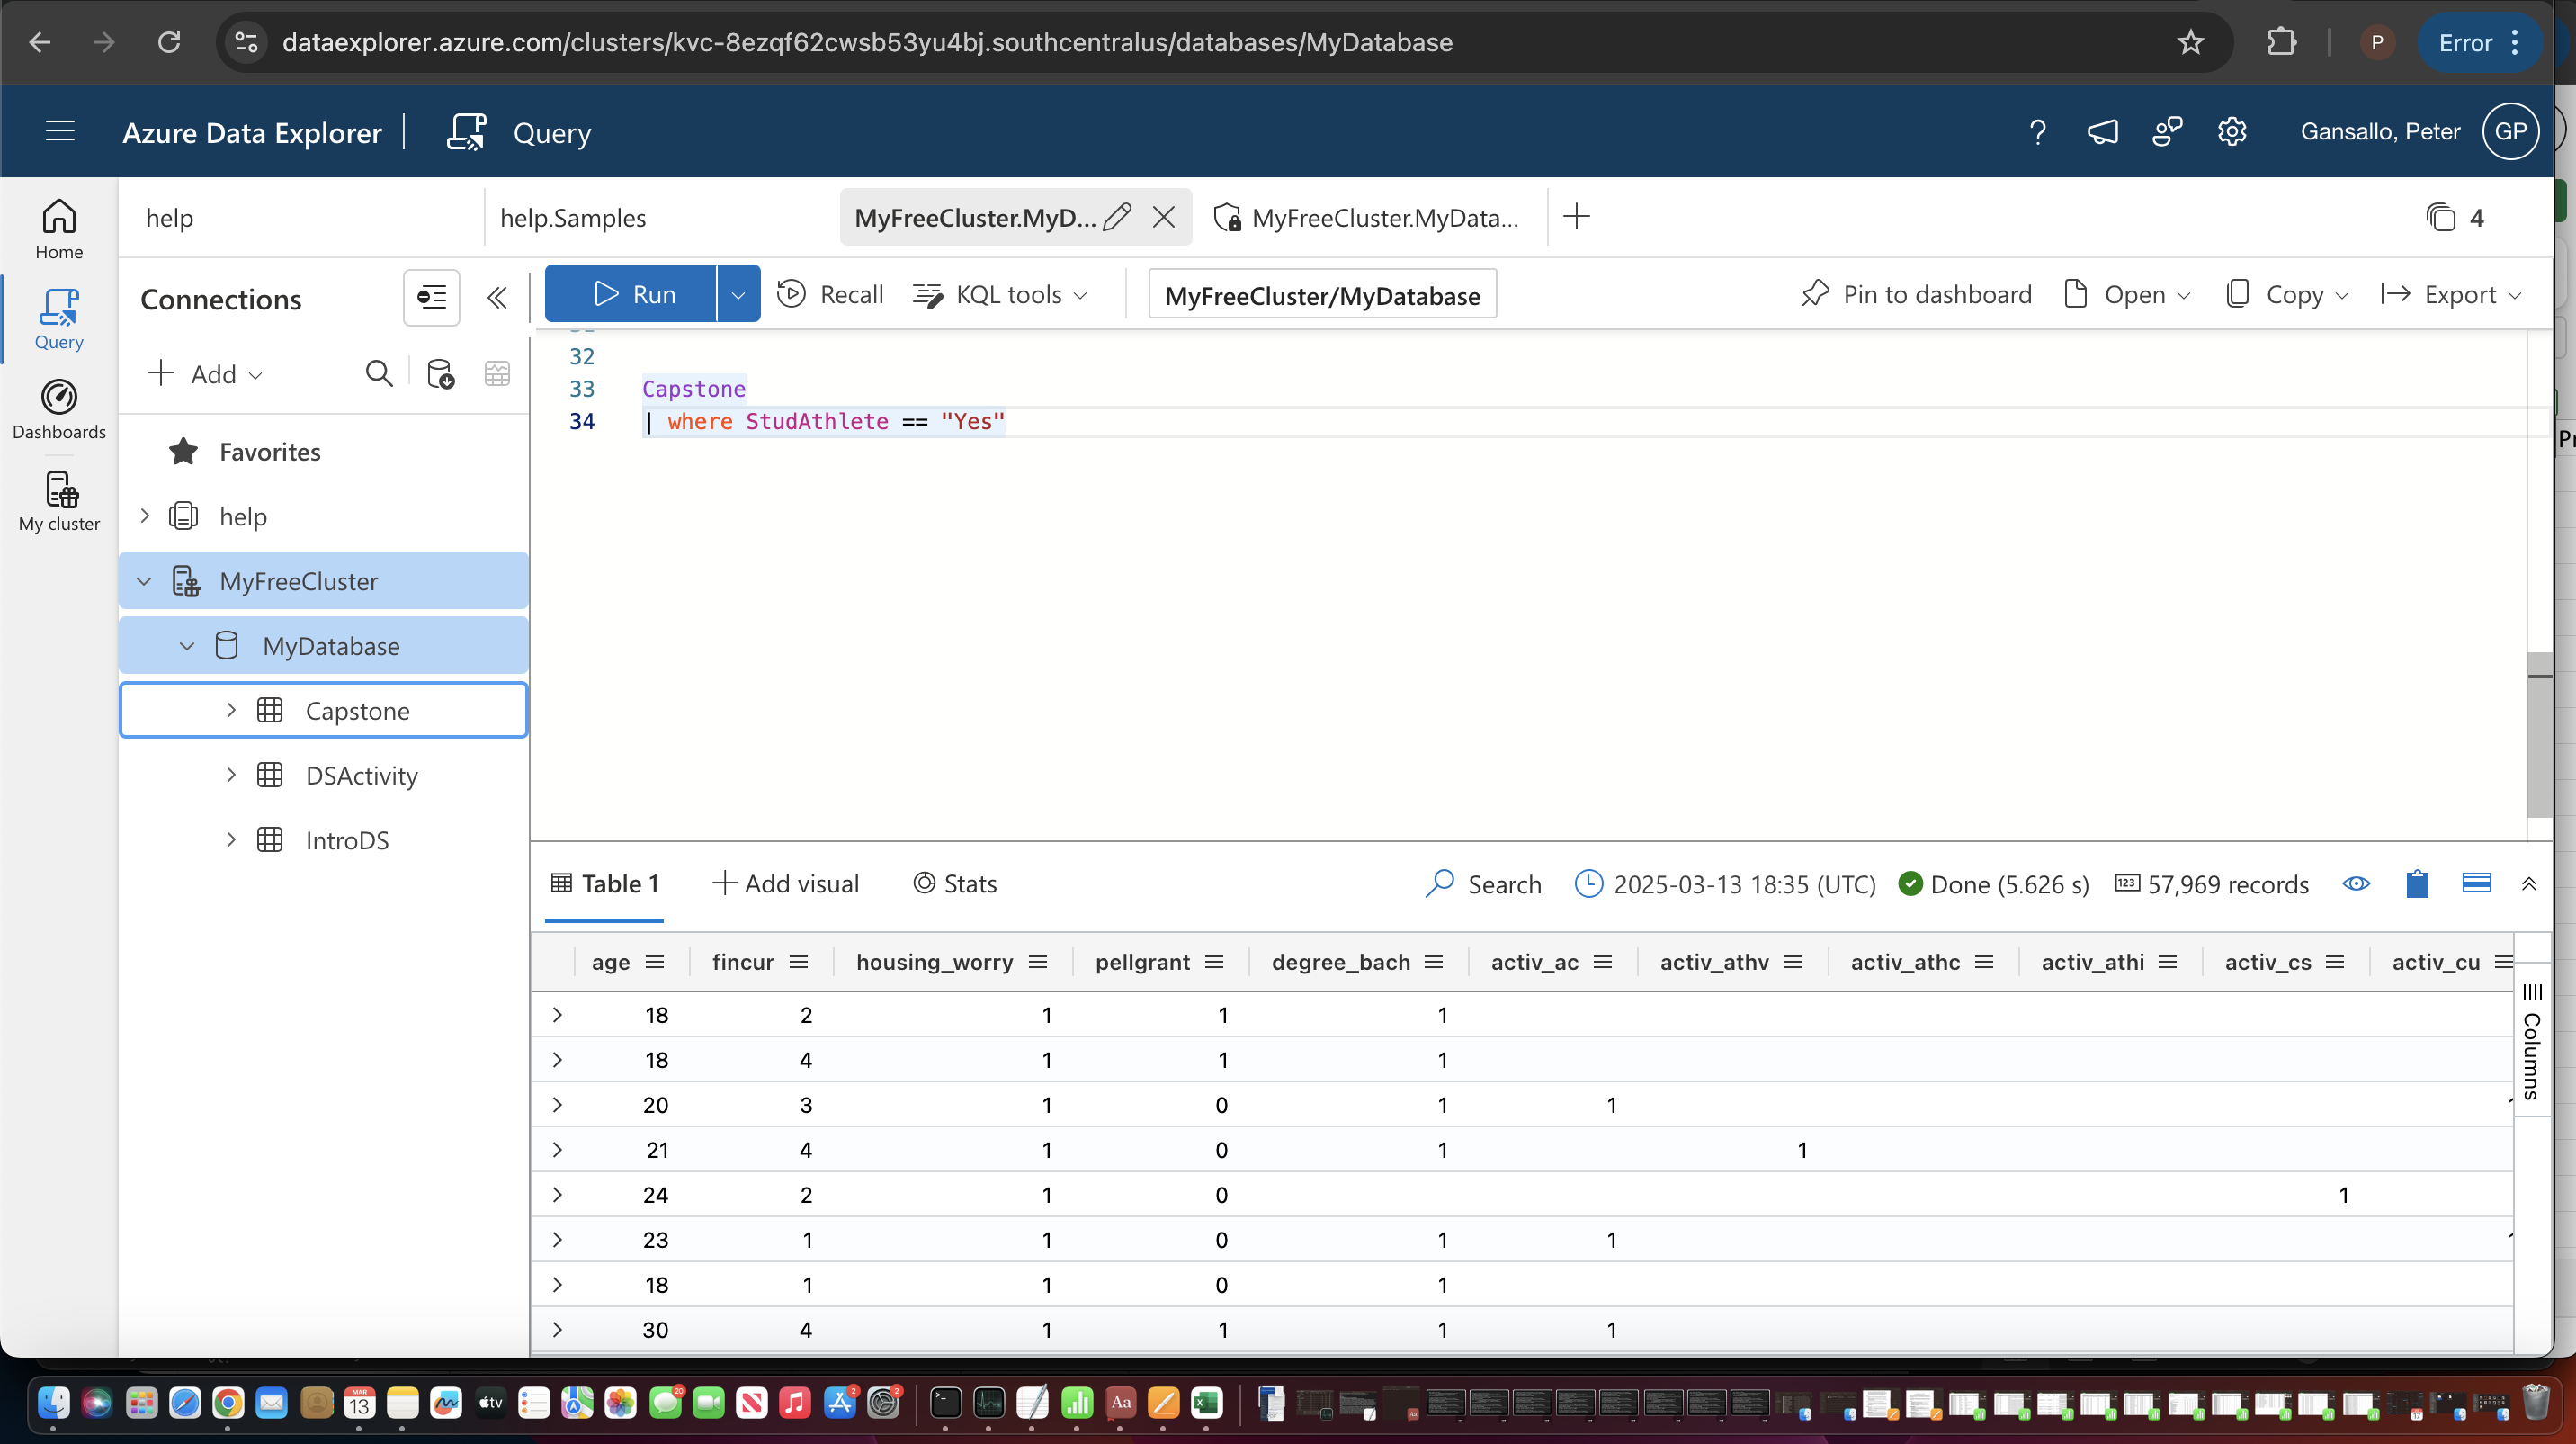

As we see about there is a better ratio of athlete's to non athlete's, and I also did more visual looks on Kusto
and removed more columns through there.

### Look at data again after filtering through Kusto

In [17]:
hms_kql = pd.read_csv("hms_kql_filtered.csv")

In [18]:
hms_kql.head()

age  sex_birth  sleep_wknight  sleep_wkend  fincur  degree_bach  \
0  18.0        1.0            NaN          NaN     2.0            1   
1  18.0        1.0            7.0          6.0     4.0            1   
2  18.0        2.0            NaN          NaN     4.0            1   
3  20.0        1.0            6.0          8.0     3.0            1   
4  21.0        2.0            NaN          NaN     4.0            1   

   covid_clsformat  yr_sch  enroll  field_hum  ...  stig_self_1  stig_self_2  \
0              NaN     1.0     1.0        NaN  ...          2.0          1.0   
1              1.0     1.0     1.0        NaN  ...          1.0          1.0   
2              NaN     1.0     1.0        NaN  ...          4.0          4.0   
3              1.0     3.0     1.0        1.0  ...          NaN          NaN   
4              NaN     3.0     1.0        NaN  ...          NaN          NaN   

   stig_self_3  pay_worry  sp_time  StudAthlete         responseid  schoolnum  \
0          1.0        NaN      NaN          Yes  R_006AKYXyGhT9Upb        106   
1          1.0        NaN      NaN          Yes  R_006rfKhxwocpzmF        106   
2          3.0        NaN      NaN           No  R_009nvDs0qZwqoW5        117   
3          NaN        NaN      NaN          Yes  R_00R9rAHb09Ydma5         23   
4          NaN        NaN      NaN          Yes  R_00SNQFMZ5Kok7Hr         11   

   non_white  white  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          0      1  

[5 rows x 83 columns]

### Collapse more columns

In [31]:
print(len(hms_kql.query('field_other == 1')))
print(len(hms_kql['field_other_text'].unique()))

11376
3524


Have to drop other column because there are 3500 differently typed majors I could possibly go into one of the simplified fields, then drop field

### New Categories for majors
#### Arts and Humanities 
- Programs that combine languages, literature, art, music, philosophy, and religion.
#### Business 
- Majors related to accountancy, finance, marketing, economics, human resources, etc.
#### Health and Medicine 
- Majors related to health principles, research, and applications like medicine, nursing, pharmacy, public health, etc.
#### Multi-Interdisciplinary Studies 
- Programs combining two or more fields of study (e.g., interdisciplinary studies, environmental studies).
#### Public and Social Services 
- Law, public administration, social services, and protective services.
#### Science, Technology, Engineering, and Math (STEM) 
- Majors in science, technology, engineering, and mathematics.
#### Social Sciences 
- Majors like psychology, sociology, economics, political science, etc.
#### Trades and Personal Services 
- Programs preparing students for technical careers or hands-on, mechanical jobs (e.g., welding, plumbing, etc.)

In [35]:
# Define the simplified mapping for categories
major_categories = {
    'field_hum': 'arts_and_humanities',  # Humanities
    'field_soc': 'social_sciences',  # Social Sciences
    'field_art': 'arts_and_humanities',  # Arts
    'field_arc': 'stem',  # Engineering/Architecture
    'field_mus': 'arts_and_humanities',  # Arts (Music)
    'field_nat': 'stem',  # Science (Natural Sciences)
    'field_eng': 'stem',  # Engineering
    'field_ph': 'health_and_medicine',  # Public Health
    'field_den': 'health_and_medicine',  # Dentistry
    'field_med': 'health_and_medicine',  # Medicine
    'field_nur': 'health_and_medicine',  # Nursing
    'field_pharm': 'health_and_medicine',  # Pharmacy
    'field_pp': 'health_and_medicine',  # Pre-professional Health
    'field_bus': 'business',  # Business
    'field_law': 'public_and_social_services',  # Law
    'field_ed': 'education',  # Education (could be interpreted as part of Public and Social Services)
    'field_sw': 'public_and_social_services',  # Social Work
    'field_und': 'undecided',  # Undecided
}

# Initialize a dictionary to store the new binary columns
for category in major_categories.values():
    if category not in hms_kql.columns:
        hms_kql[category] = 0  # Initially set all to 0

hms_kql.head()

age  sex_birth  sleep_wknight  sleep_wkend  fincur  degree_bach  \
0  18.0        1.0            NaN          NaN     2.0            1   
1  18.0        1.0            7.0          6.0     4.0            1   
2  18.0        2.0            NaN          NaN     4.0            1   
3  20.0        1.0            6.0          8.0     3.0            1   
4  21.0        2.0            NaN          NaN     4.0            1   

   covid_clsformat  yr_sch  enroll  field_hum  ...  non_white  white  \
0              NaN     1.0     1.0        NaN  ...          0      1   
1              1.0     1.0     1.0        NaN  ...          0      1   
2              NaN     1.0     1.0        NaN  ...          0      1   
3              1.0     3.0     1.0        1.0  ...          0      1   
4              NaN     3.0     1.0        NaN  ...          0      1   

   arts_and_humanities  social_sciences  stem  health_and_medicine  business  \
0                    0                0     0                    0         0   
1                    0                0     0                    0         0   
2                    0                0     0                    0         0   
3                    0                0     0                    0         0   
4                    0                0     0                    0         0   

   public_and_social_services  education  undecided  
0                           0          0          0  
1                           0          0          0  
2                           0          0          0  
3                           0          0          0  
4                           0          0          0  

[5 rows x 91 columns]

#### Assign majors to major categories

In [38]:

# Loop through each row to update the binary columns based on selected majors
for index, row in hms_kql.iterrows():
    # For each major, check if it was selected and set the corresponding category column to 1
    for major, category in major_categories.items():
        if row[major] == 1:
            hms_kql.at[index, category] = 1 

# Drop the original major fields as we now have expanded columns
major_columns = major_categories.keys()
hms_kql = hms_kql.drop(columns=major_columns)

# Drop the 'other' columns
hms_kql = hms_kql.drop(columns=['field_other', 'field_other_text'])

### Look at the dataset again

In [40]:
if 'stem' in hms_kql.columns:
    print('yes')
else:
    print('no')

yes


In [41]:
hms_kql.head(25)

age  sex_birth  sleep_wknight  sleep_wkend  fincur  degree_bach  \
0   18.0        1.0            NaN          NaN     2.0            1   
1   18.0        1.0            7.0          6.0     4.0            1   
2   18.0        2.0            NaN          NaN     4.0            1   
3   20.0        1.0            6.0          8.0     3.0            1   
4   21.0        2.0            NaN          NaN     4.0            1   
5   23.0        2.0            6.0          7.0     1.0            1   
6   18.0        1.0            5.0          5.0     1.0            1   
7   30.0        2.0            NaN          NaN     4.0            1   
8   20.0        2.0            NaN          NaN     1.0            1   
9   18.0        2.0            NaN          NaN     2.0            1   
10  18.0        2.0            9.0          7.0     3.0            1   
11  22.0        1.0            9.0          8.0     3.0            1   
12  27.0        1.0            9.0          8.0     3.0            1   
13  19.0        1.0            NaN          NaN     4.0            1   
14  20.0        1.0            7.0          6.0     2.0            1   
15  18.0        1.0            NaN          NaN     4.0            1   
16  18.0        1.0            NaN          NaN     3.0            1   
17  20.0        1.0            9.0          8.0     1.0            1   
18  18.0        1.0            7.0          7.0     5.0            1   
19  18.0        1.0            6.0          8.0     1.0            1   
20  23.0        2.0            4.0          5.0     1.0            1   
21  18.0        2.0            NaN          NaN     4.0            1   
22  20.0        1.0            NaN          NaN     1.0            1   
23  20.0        1.0            5.0          8.0     2.0            1   
24  20.0        1.0            7.0          8.0     3.0            1   

    covid_clsformat  yr_sch  enroll  field_prep  ...  non_white  white  \
0               NaN     1.0     1.0         NaN  ...          0      1   
1               1.0     1.0     1.0         NaN  ...          0      1   
2               NaN     1.0     1.0         NaN  ...          0      1   
3               1.0     3.0     1.0         NaN  ...          0      1   
4               NaN     3.0     1.0         NaN  ...          0      1   
5               2.0     4.0     1.0         NaN  ...          1      0   
6               1.0     1.0     1.0         NaN  ...          0      1   
7               NaN     7.0     1.0         NaN  ...          0      1   
8               1.0     2.0     1.0         NaN  ...          0      1   
9               NaN     1.0     1.0         NaN  ...          0      1   
10              3.0     1.0     1.0         NaN  ...          0      1   
11              1.0     4.0     1.0         NaN  ...          0      1   
12              3.0     4.0     1.0         NaN  ...          1      0   
13              NaN     1.0     1.0         NaN  ...          0      1   
14              2.0     3.0     1.0         NaN  ...          0      1   
15              NaN     1.0     1.0         NaN  ...          0      1   
16              NaN     1.0     1.0         NaN  ...          1      0   
17              2.0     2.0     1.0         NaN  ...          0      1   
18              1.0     1.0     1.0         1.0  ...          1      0   
19              1.0     1.0     1.0         NaN  ...          0      1   
20              3.0     4.0     1.0         NaN  ...          0      1   
21              NaN     1.0     1.0         NaN  ...          1      1   
22              NaN     3.0     1.0         NaN  ...          0      1   
23              1.0     2.0     1.0         NaN  ...          1      0   
24              1.0     2.0     1.0         NaN  ...          0      1   

    arts_and_humanities  social_sciences  stem  health_and_medicine  business  \
0                     0                0     0                    0         1   
1                     0                0     

In [45]:
hms_kql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62547 entries, 0 to 62546
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         62547 non-null  float64
 1   sex_birth                   62507 non-null  float64
 2   sleep_wknight               28914 non-null  float64
 3   sleep_wkend                 28906 non-null  float64
 4   fincur                      62148 non-null  float64
 5   degree_bach                 62547 non-null  int64  
 6   covid_clsformat             30611 non-null  float64
 7   yr_sch                      61944 non-null  float64
 8   enroll                      61955 non-null  float64
 9   field_prep                  6001 non-null   float64
 10  gr_A                        45286 non-null  float64
 11  gr_B                        36408 non-null  float64
 12  gr_C                        8607 non-null   float64
 13  gr_D                        635

Collapse Grade column

In [48]:
# Dictionary to map one-word categories to numbers
grade_mapping = {
    'gr_A': 4,
    'gr_B': 3,
    'gr_C': 2,
    'gr_D': 1,
    'gr_F': 0
}
grade_columns = grade_mapping.keys()
grade_collapsed = []
for index, row in hms_kql[grade_columns].iterrows():
    # Create a list to store grade codes for the current row
    grade_codes_for_row = []
    
    # Loop through the columns and check if the value is 1 (i.e., selected by the student)
    for grade in grade_columns:
        if row[grade] == 1:
            # Get the corresponding grade and map
            grade_codes_for_row.append(grade_mapping[grade])

    if grade_codes_for_row == []:
        grade_collapsed.append(np.nan)
    else:
        # add the list of grade codes for the current row to a list for all rows
        grade_collapsed.append(grade_codes_for_row)

# After the loop, add the grade_collapsed list as a new column in the DataFrame
hms_kql['grade_earned'] = grade_collapsed

# Drop the columns that were used for collapsing the majors
hms_kql = hms_kql.drop(columns=grade_columns)

# Drop the 'other' columns
hms_kql = hms_kql.drop(columns=['gr_none','gr_dk'])

In [49]:
hms_kql.head(10)

age  sex_birth  sleep_wknight  sleep_wkend  fincur  degree_bach  \
0  18.0        1.0            NaN          NaN     2.0            1   
1  18.0        1.0            7.0          6.0     4.0            1   
2  18.0        2.0            NaN          NaN     4.0            1   
3  20.0        1.0            6.0          8.0     3.0            1   
4  21.0        2.0            NaN          NaN     4.0            1   
5  23.0        2.0            6.0          7.0     1.0            1   
6  18.0        1.0            5.0          5.0     1.0            1   
7  30.0        2.0            NaN          NaN     4.0            1   
8  20.0        2.0            NaN          NaN     1.0            1   
9  18.0        2.0            NaN          NaN     2.0            1   

   covid_clsformat  yr_sch  enroll  field_prep  ...  white  \
0              NaN     1.0     1.0         NaN  ...      1   
1              1.0     1.0     1.0         NaN  ...      1   
2              NaN     1.0     1.0         NaN  ...      1   
3              1.0     3.0     1.0         NaN  ...      1   
4              NaN     3.0     1.0         NaN  ...      1   
5              2.0     4.0     1.0         NaN  ...      0   
6              1.0     1.0     1.0         NaN  ...      1   
7              NaN     7.0     1.0         NaN  ...      1   
8              1.0     2.0     1.0         NaN  ...      1   
9              NaN     1.0     1.0         NaN  ...      1   

   arts_and_humanities  social_sciences  stem  health_and_medicine  business  \
0                    0                0     0                    0         1   
1                    0                0     0                    0         0   
2                    0                0     0                    0         0   
3                    1                0     0                    0         0   
4                    0                0     0                    0         0   
5                    0                0     1                    0         0   
6                    0                0     1                    0         0   
7                    1                0     0                    0         0   
8                    0                0     0                    0         0   
9                    0                0     0                    1         0   

   public_and_social_services  education  undecided  grade_earned  
0                           0          0          0        [4, 3]  
1                           0          1          0           [4]  
2                           0          0          1           [3]  
3                           0          1          0        [4, 3]  
4                           0          0          0           [4]  
5                           0          0          0           [2]  
6                           0          0          0        [4, 3]  
7                           0          0          0        [3, 2]  
8                           0          0          0           NaN  
9                           0          0          0           [3]  

[10 rows x 65 columns]

In [50]:
hms_kql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62547 entries, 0 to 62546
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         62547 non-null  float64
 1   sex_birth                   62507 non-null  float64
 2   sleep_wknight               28914 non-null  float64
 3   sleep_wkend                 28906 non-null  float64
 4   fincur                      62148 non-null  float64
 5   degree_bach                 62547 non-null  int64  
 6   covid_clsformat             30611 non-null  float64
 7   yr_sch                      61944 non-null  float64
 8   enroll                      61955 non-null  float64
 9   field_prep                  6001 non-null   float64
 10  flourish                    59288 non-null  float64
 11  deprawsc                    58138 non-null  float64
 12  anx_score                   58039 non-null  float64
 13  ed_scoff                    579

#### Collapse inf_1-10 which is the support area one has in the code book/questionnaire

In [55]:
support_columns = ['inf_1','inf_2','inf_3','inf_4','inf_5','inf_6','inf_7','inf_9','inf_10']

support_collapsed = []
for index, row in hms_kql[support_columns].iterrows():
    # support area value
    support_value = 0
    
    # Loop through the columns and check if the value is 1 (i.e., selected by the student)
    for support_area in support_columns:
        if row[support_area] == 1:
            
            # Get the support areas
            support_value += 1
            
    # add the list of grade codes for the current row to a list for all rows
    support_collapsed.append(support_value)

# After the loop, add the grade_collapsed list as a new column in the DataFrame
hms_kql['support_values'] = support_collapsed

# Drop the columns that were used for collapsing the majors
hms_kql = hms_kql.drop(columns=support_columns)

# Drop the inf_8 columns
hms_kql = hms_kql.drop(columns=['inf_8'])

In [56]:
hms_kql.head(10)

age  sex_birth  sleep_wknight  sleep_wkend  fincur  degree_bach  \
0  18.0        1.0            NaN          NaN     2.0            1   
1  18.0        1.0            7.0          6.0     4.0            1   
2  18.0        2.0            NaN          NaN     4.0            1   
3  20.0        1.0            6.0          8.0     3.0            1   
4  21.0        2.0            NaN          NaN     4.0            1   
5  23.0        2.0            6.0          7.0     1.0            1   
6  18.0        1.0            5.0          5.0     1.0            1   
7  30.0        2.0            NaN          NaN     4.0            1   
8  20.0        2.0            NaN          NaN     1.0            1   
9  18.0        2.0            NaN          NaN     2.0            1   

   covid_clsformat  yr_sch  enroll  field_prep  ...  arts_and_humanities  \
0              NaN     1.0     1.0         NaN  ...                    0   
1              1.0     1.0     1.0         NaN  ...                    0   
2              NaN     1.0     1.0         NaN  ...                    0   
3              1.0     3.0     1.0         NaN  ...                    1   
4              NaN     3.0     1.0         NaN  ...                    0   
5              2.0     4.0     1.0         NaN  ...                    0   
6              1.0     1.0     1.0         NaN  ...                    0   
7              NaN     7.0     1.0         NaN  ...                    1   
8              1.0     2.0     1.0         NaN  ...                    0   
9              NaN     1.0     1.0         NaN  ...                    0   

   social_sciences  stem  health_and_medicine  business  \
0                0     0                    0         1   
1                0     0                    0         0   
2                0     0                    0         0   
3                0     0                    0         0   
4                0     0                    0         0   
5                0     1                    0         0   
6                0     1                    0         0   
7                0     0                    0         0   
8                0     0                    0         0   
9                0     0                    1         0   

   public_and_social_services  education  undecided  grade_earned  \
0                           0          0          0        [4, 3]   
1                           0          1          0           [4]   
2                           0          0          1           [3]   
3                           0          1          0        [4, 3]   
4                           0          0          0           [4]   
5                           0          0          0           [2]   
6                           0          0          0        [4, 3]   
7                           0          0          0        [3, 2]   
8                           0          0          0           NaN   
9                           0          0          0           [3]   

   support_values  
0               3  
1               5  
2               2  
3               3  
4               0  
5               5  
6               1  
7               1  
8               0  
9               0  

[10 rows x 56 columns]

In [57]:
hms_kql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62547 entries, 0 to 62546
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         62547 non-null  float64
 1   sex_birth                   62507 non-null  float64
 2   sleep_wknight               28914 non-null  float64
 3   sleep_wkend                 28906 non-null  float64
 4   fincur                      62148 non-null  float64
 5   degree_bach                 62547 non-null  int64  
 6   covid_clsformat             30611 non-null  float64
 7   yr_sch                      61944 non-null  float64
 8   enroll                      61955 non-null  float64
 9   field_prep                  6001 non-null   float64
 10  flourish                    59288 non-null  float64
 11  deprawsc                    58138 non-null  float64
 12  anx_score                   58039 non-null  float64
 13  ed_scoff                    579

#### Deciding to remove all null values and stick with about 27500 rows of data

In [62]:
# Drop columns that missing significant data
hms_cleaned = hms_kql.drop(columns=['pay_worry', 'sp_time', 'field_prep'])

In [64]:
hms_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62547 entries, 0 to 62546
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         62547 non-null  float64
 1   sex_birth                   62507 non-null  float64
 2   sleep_wknight               28914 non-null  float64
 3   sleep_wkend                 28906 non-null  float64
 4   fincur                      62148 non-null  float64
 5   degree_bach                 62547 non-null  int64  
 6   covid_clsformat             30611 non-null  float64
 7   yr_sch                      61944 non-null  float64
 8   enroll                      61955 non-null  float64
 9   flourish                    59288 non-null  float64
 10  deprawsc                    58138 non-null  float64
 11  anx_score                   58039 non-null  float64
 12  ed_scoff                    57946 non-null  float64
 13  sui_idea                    584

In [66]:
# Drop NaN values for each column and update the DataFrame
for column in hms_cleaned.columns:
    hms_cleaned[column] = hms_cleaned[column].dropna()

In [68]:
hms_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62547 entries, 0 to 62546
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         62547 non-null  float64
 1   sex_birth                   62507 non-null  float64
 2   sleep_wknight               28914 non-null  float64
 3   sleep_wkend                 28906 non-null  float64
 4   fincur                      62148 non-null  float64
 5   degree_bach                 62547 non-null  int64  
 6   covid_clsformat             30611 non-null  float64
 7   yr_sch                      61944 non-null  float64
 8   enroll                      61955 non-null  float64
 9   flourish                    59288 non-null  float64
 10  deprawsc                    58138 non-null  float64
 11  anx_score                   58039 non-null  float64
 12  ed_scoff                    57946 non-null  float64
 13  sui_idea                    584

In [74]:
hms_cleaned = hms_kql.drop(columns=['covid_clsformat', 'sp_time', 'field_prep','degree_bach', 'ther_vis'])

In [105]:
hms_factors = hms_cleaned[['age','sex_birth','white','non_white','stig_serv_1','stig_per_1','stig_per_3','stig_per_2','stig_self_3','stig_self_2','stig_self_1','stig_pcv_3','stig_pcv_1','stig_pcv_2','percneed','knowwher','support_values','dx_any','responseid','ther_any', 'grade_earned','fincur', 'yr_sch', 'sui_idea', 'sui_plan', 'sui_att', 'lonesc', 'flourish', 'deprawsc','anx_score','ed_scoff', 'StudAthlete','arts_and_humanities', 'social_sciences', 'stem', 'health_and_medicine', 'business', 'public_and_social_services', 'education', 'undecided']]
hms_factors_exercise = hms_cleaned[['age','sex_birth','white','non_white','exerc','stig_serv_1','stig_per_1','stig_per_3','stig_per_2','stig_self_3','stig_self_2','stig_self_1','stig_pcv_3','stig_pcv_1','stig_pcv_2','percneed','knowwher','support_values','dx_any','responseid','ther_any', 'grade_earned','fincur', 'yr_sch', 'sui_idea', 'sui_plan', 'sui_att', 'lonesc', 'flourish', 'deprawsc','anx_score','ed_scoff', 'StudAthlete', 'arts_and_humanities', 'social_sciences', 'stem', 'health_and_medicine', 'business', 'public_and_social_services', 'education', 'undecided']]
hms_factors_sleep = hms_cleaned[['age','sex_birth','sleep_wkend','white','non_white','exerc','stig_serv_1','stig_per_1','stig_per_3','stig_per_2','stig_self_3','stig_self_2','stig_self_1','stig_pcv_3','stig_pcv_1','stig_pcv_2','percneed','knowwher','support_values','dx_any','responseid','ther_any', 'grade_earned','fincur', 'yr_sch', 'sui_idea', 'sui_plan', 'sui_att', 'lonesc', 'flourish', 'deprawsc','anx_score','ed_scoff', 'StudAthlete', 'arts_and_humanities', 'social_sciences', 'stem', 'health_and_medicine', 'business', 'public_and_social_services', 'education', 'undecided']]

In [107]:
hms_factors.info()
hms_factors_exercise.info()
hms_factors_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62547 entries, 0 to 62546
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         62547 non-null  float64
 1   sex_birth                   62507 non-null  float64
 2   white                       62547 non-null  int64  
 3   non_white                   62547 non-null  int64  
 4   stig_serv_1                 27659 non-null  float64
 5   stig_per_1                  54482 non-null  float64
 6   stig_per_3                  27456 non-null  float64
 7   stig_per_2                  27467 non-null  float64
 8   stig_self_3                 27377 non-null  float64
 9   stig_self_2                 27401 non-null  float64
 10  stig_self_1                 27428 non-null  float64
 11  stig_pcv_3                  27473 non-null  float64
 12  stig_pcv_1                  54544 non-null  float64
 13  stig_pcv_2                  274

#### Drop null values before final collapsing of columns

In [112]:
hms_factors = hms_factors.dropna()
hms_factors_exercise = hms_factors_exercise.dropna()
hms_factors_sleep = hms_factors_sleep.dropna()

#### Collapse Stigma types into scores

In [115]:
personal_stigma = ['stig_per_1','stig_per_2','stig_per_3']
perceived_stigma = ['stig_pcv_1','stig_pcv_2','stig_pcv_3']
self_stigma = ['stig_self_1','stig_self_2','stig_self_3']

def stig_score_calc(stig_category, category_name, df):
    stig_scores = []
    for index, row in df[stig_category].iterrows():
        # new stigma score
        stig_score = 0
        
        # Loop through the columns and get the level of stigma the student chose the higher the score the more negative connotation they have to it
        
        for stigma in stig_category:
            stig_score += row[stigma]
                
        # add the list of grade codes for the current row to a list for all rows
        stig_scores.append(stig_score)
    
    # After the loop, add list as a new column in the DataFrame
    df[category_name] = stig_scores
    
    # Drop the columns that were used
    df.drop(columns=stig_category, inplace=True)
    return df

#Without exercise as factor
updated_hms_factors = stig_score_calc(personal_stigma,"personal_stigma",hms_factors)
updated_hms_factors = stig_score_calc(perceived_stigma, "perceived_stigma", hms_factors)
updated_hms_factors = stig_score_calc(self_stigma, "self_stigma", hms_factors)

#With exercise as factor

updated_hms_factors_exercise = stig_score_calc(personal_stigma,"personal_stigma",hms_factors_exercise)
updated_hms_factors_exercise = stig_score_calc(perceived_stigma, "perceived_stigma", hms_factors_exercise)
updated_hms_factors_exercise = stig_score_calc(self_stigma, "self_stigma", hms_factors_exercise)

### Rename variables for better clarity

In [117]:
def column_clarify(df):
    # Rename columns based on their presence in the DataFrame
    if 'age' in df.columns: 
        df = df.rename(columns={
            'age': 'student_age',
            'sex_birth': 'gender_birth',
            'majors': 'student_major',
            'percneed': 'perceived_help_need',
            'knowwher': 'know_where_help',
            'support_values': 'num_of_support_areas',
            'dx_any': 'diagnosed_mental_illness',
            'responseid': 'response_id',
            'ther_any': 'therapy_past12_months',
            'grade_earned': 'gpa',
            'fincur': 'financial_stress',
            'yr_sch': 'year_in_school',
            'sui_idea': 'suicide_idea',
            'sui_plan': 'suicide_plan',
            'sui_att': 'suicide_attempt',
            'lonesc': 'lonely_score',
            'flourish': 'mental_wellness_score',
            'deprawsc': 'depression_score',
            'anx_score': 'anxiety_score',
            'ed_scoff': 'eating_disorder_score',
            'StudAthlete': 'student_athlete',
            'stig_serv_1': 'seek_help_if_need',
            'personal_stigma': 'personal_stigma_score',
            'perceived_stigma': 'perceived_stigma_score',
            'self_stigma': 'self_stigma_score'
        })
    
    if 'exerc' in df.columns:
        df = df.rename(columns={
            'exerc': 'exercise_hours_weekly'
        })  
    return df

clarify_hms_factors = column_clarify(updated_hms_factors)
clarify_hms_factors_exercise = column_clarify(updated_hms_factors_exercise)


In [118]:
clarify_hms_factors.info()
clarify_hms_factors_exercise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23151 entries, 0 to 62545
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 23151 non-null  float64
 1   gender_birth                23151 non-null  float64
 2   white                       23151 non-null  int64  
 3   non_white                   23151 non-null  int64  
 4   seek_help_if_need           23151 non-null  float64
 5   perceived_help_need         23151 non-null  float64
 6   know_where_help             23151 non-null  float64
 7   num_of_support_areas        23151 non-null  int64  
 8   diagnosed_mental_illness    23151 non-null  float64
 9   response_id                 23151 non-null  object 
 10  therapy_past12_months       23151 non-null  float64
 11  gpa                         23151 non-null  object 
 12  financial_stress            23151 non-null  float64
 13  year_in_school              23151 no

## Final Cleaning

In [123]:
# Define a function to clean GPA for a DataFrame
def clean_gpa(df, gpa_column):
    # Loop through each row to update the GPA from list to float
    for index, row in df.iterrows():
        # If the GPA list is empty, drop the row
        if row[gpa_column] == []:
            df.drop(index, inplace=True)
        else:
            # If the GPA list is not empty, calculate the average GPA
            df.at[index, gpa_column] = sum(row[gpa_column]) / len(row[gpa_column])
    return df

final_hms_factors = clean_gpa(clarify_hms_factors, 'gpa')
final_hms_exercise = clean_gpa(clarify_hms_factors_exercise, 'gpa')

In [124]:
# Not gonna use responseID so dropping it
clarify_hms_factors.drop(columns=['response_id'], inplace=True)
clarify_hms_factors_exercise.drop(columns=['response_id'], inplace=True)

Clean up missing majors

In [128]:
def clean_majors(df, majors_column):
    
    # Loop through each row to remove a row if all majors have 0 as a value
    for index, row in df.iterrows():
        # If the all majors are 0, drop the row
        list_check = []
        for major in majors_column:
            list_check.append(row[major])
        # we account for 8 major categories 
        if list_check == [0,0,0,0,0,0,0,0]:
            df.drop(index, inplace=True)

    return df
    
# Clean majors for both DataFrames
final_hms_factors = clean_majors(clarify_hms_factors, ['arts_and_humanities', 'social_sciences', 'stem','health_and_medicine', 'business', 'public_and_social_services', 'education', 'undecided'])
final_hms_exercise = clean_majors(clarify_hms_factors_exercise, ['arts_and_humanities', 'social_sciences', 'stem','health_and_medicine', 'business', 'public_and_social_services', 'education', 'undecided'])

In [129]:
final_hms_factors.head()

student_age  gender_birth  white  non_white  seek_help_if_need  \
0          18.0           1.0      1          0                3.0   
1          18.0           1.0      1          0                3.0   
2          18.0           2.0      1          0                2.0   
5          23.0           2.0      0          1                3.0   
11         22.0           1.0      1          0                2.0   

    perceived_help_need  know_where_help  num_of_support_areas  \
0                   1.0              3.0                     3   
1                   3.0              1.0                     5   
2                   2.0              2.0                     2   
5                   1.0              1.0                     5   
11                  6.0              2.0                     0   

    diagnosed_mental_illness  therapy_past12_months  ... social_sciences  \
0                        1.0                    1.0  ...               0   
1                        0.0                    0.0  ...               0   
2                        0.0                    0.0  ...               0   
5                        1.0                    1.0  ...               0   
11                       0.0                    0.0  ...               0   

    stem  health_and_medicine  business  public_and_social_services  \
0      0                    0         1                           0   
1      0                    0         0                           0   
2      0                    0         0                           0   
5      1                    0         0                           0   
11     1                    0         0                           0   

    education  undecided  personal_stigma_score  perceived_stigma_score  \
0           0          0                   12.0                    13.0   
1           1          0                   13.0                     8.0   
2           0          1                    9.0                    11.0   
5           0          0                   11.0                     9.0   
11          0          0                   13.0                    12.0   

    self_stigma_score  
0                 4.0  
1                 3.0  
2                11.0  
5                 6.0  
11                6.0  

[5 rows x 33 columns]

#### Convert Student athlete to binary values then finally make all numeric values in dataset a float

In [131]:
# Convert 'yes' to 1 and 'no' to 0 in the 'student_athlete' column for both DataFrames
final_hms_factors['student_athlete'] = final_hms_factors['student_athlete'].replace({'Yes': 1, 'No': 0})
final_hms_exercise['student_athlete'] = final_hms_exercise['student_athlete'].replace({'Yes': 1, 'No': 0})

/var/folders/tf/t9t14sq56tq7k5310hms5l2r0000gn/T/ipykernel_1043/2424145417.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_hms_factors['student_athlete'] = final_hms_factors['student_athlete'].replace({'Yes': 1, 'No': 0})
/var/folders/tf/t9t14sq56tq7k5310hms5l2r0000gn/T/ipykernel_1043/2424145417.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_hms_exercise['student_athlete'] = final_hms_exercise['student_athlete'].replace({'Yes': 1, 'No': 0})


#### where no race is selected drop these columns as well

In [133]:
def clean_race(df, race_column):
    
    # Loop through each row to remove a row if all majors have 0 as a value and collapse into one column of race
    race_values = []
    for index, row in df.iterrows():
        # If the all majors are 0, drop the row
        list_check = []
        for race in race_column:
            list_check.append(row[race])

        #if not white checked then we'll classify as non white even if mixed
        if row[race_column[1]] == 1:
            race_values.append(1)
            
        # drop no race defined rows
        elif list_check == [0,0]:
            df.drop(index, inplace=True)
        else:
           race_values.append(0) 

    df.drop(columns=['white','non_white'], inplace=True)   
    df['not_white'] = race_values
    
    return df

# Clean race for both DataFrames
final_hms = clean_race(final_hms_factors, ['white','non_white'])
final_hms_exer = clean_race(final_hms_exercise, ['white','non_white'])

#### Clean gender column
remove intersex gender as there are only 4 rows in the dataset

In [135]:
final_hms_exer.query("gender_birth == 3.0")

student_age  gender_birth  exercise_hours_weekly  seek_help_if_need  \
8665          21.0           3.0                    3.0                2.0   
14486         20.0           3.0                    3.0                0.0   
23706         21.0           3.0                    1.0                3.0   
58253         22.0           3.0                    2.0                0.0   

       perceived_help_need  know_where_help  num_of_support_areas  \
8665                   1.0              1.0                     2   
14486                  1.0              2.0                     1   
23706                  1.0              3.0                     3   
58253                  4.0              3.0                     0   

       diagnosed_mental_illness  therapy_past12_months  gpa  ...  stem  \
8665                        1.0                    1.0  3.5  ...     0   
14486                       1.0                    1.0  4.0  ...     0   
23706                       0.0                    0.0  2.5  ...     1   
58253                       0.0                    0.0  4.0  ...     0   

       health_and_medicine  business  public_and_social_services  education  \
8665                     0         0                           0          0   
14486                    0         0                           0          0   
23706                    0         0                           0          0   
58253                    0         0                           0          0   

       undecided  personal_stigma_score  perceived_stigma_score  \
8665           0                   13.0                    11.0   
14486          0                   13.0                     8.0   
23706          0                   13.0                     9.0   
58253          0                   13.0                    10.0   

       self_stigma_score  not_white  
8665                12.0          0  
14486                7.0          0  
23706                3.0          0  
58253                9.0          0  

[4 rows x 33 columns]

In [136]:
final_hms_exer = final_hms_exer.query("gender_birth != 3.0")

Make all values a float

In [138]:
# Convert all columns in the DataFrame to float

final_hms = final_hms.astype(float)
final_hms_exer = final_hms_exer.astype(float)

# Check dataframe
final_hms.info()
final_hms_exer.info()

final_hms.to_csv("cleaned_hms.csv", index=False)
final_hms_exer.to_csv("cleaned_hms_exercise.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 18434 entries, 0 to 62543
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 18434 non-null  float64
 1   gender_birth                18434 non-null  float64
 2   seek_help_if_need           18434 non-null  float64
 3   perceived_help_need         18434 non-null  float64
 4   know_where_help             18434 non-null  float64
 5   num_of_support_areas        18434 non-null  float64
 6   diagnosed_mental_illness    18434 non-null  float64
 7   therapy_past12_months       18434 non-null  float64
 8   gpa                         18434 non-null  float64
 9   financial_stress            18434 non-null  float64
 10  year_in_school              18434 non-null  float64
 11  suicide_idea                18434 non-null  float64
 12  suicide_plan                18434 non-null  float64
 13  suicide_attempt             18434 no

### Data is mostly cleaned and gonna look in Kusto for preliminary Analysis

After looking in Kusto going to collapse majors into one column, and only gonna focus on people with one major, and keep the dataset including exercise because exercise seems to be a big factor to mental wellness score

In [331]:
kusto_hms = pd.read_csv('hms.csv') # cleaned_hms_exercise.csv is the same as this except hms.csv is where students only selected one major as their major

In [333]:
kusto_hms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 7838 non-null   float64
 1   gender_birth                7838 non-null   int64  
 2   exercise_hours_weekly       7838 non-null   int64  
 3   seek_help_if_need           7838 non-null   int64  
 4   perceived_help_need         7838 non-null   int64  
 5   know_where_help             7838 non-null   int64  
 6   num_of_support_areas        7838 non-null   int64  
 7   diagnosed_mental_illness    7838 non-null   int64  
 8   therapy_past12_months       7838 non-null   int64  
 9   gpa                         7838 non-null   float64
 10  financial_stress            7838 non-null   int64  
 11  year_in_school              7838 non-null   int64  
 12  suicide_idea                7838 non-null   int64  
 13  suicide_plan                7838 

Get the columns for majors and map major to a float value and collapse

In [336]:
major_columns = dict()
index = 0
for major in major_categories.values():
    if major not in major_columns:
        major_columns[major] = index
        index+=1
print(major_columns)

{'arts_and_humanities': 0, 'social_sciences': 1, 'stem': 2, 'health_and_medicine': 3, 'business': 4, 'public_and_social_services': 5, 'education': 6, 'undecided': 7}


In [338]:
major_values = []
for index, row in kusto_hms.iterrows():
    
    for major in major_columns:
        if row[major] == 1:
            major_values.append(major_columns[major])

kusto_hms['student_major'] = major_values
kusto_hms.drop(columns=major_columns.keys(),inplace = True)
kusto_hms = kusto_hms.astype(float)

In [340]:
kusto_hms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_age               7838 non-null   float64
 1   gender_birth              7838 non-null   float64
 2   exercise_hours_weekly     7838 non-null   float64
 3   seek_help_if_need         7838 non-null   float64
 4   perceived_help_need       7838 non-null   float64
 5   know_where_help           7838 non-null   float64
 6   num_of_support_areas      7838 non-null   float64
 7   diagnosed_mental_illness  7838 non-null   float64
 8   therapy_past12_months     7838 non-null   float64
 9   gpa                       7838 non-null   float64
 10  financial_stress          7838 non-null   float64
 11  year_in_school            7838 non-null   float64
 12  suicide_idea              7838 non-null   float64
 13  suicide_plan              7838 non-null   float64
 14  suicide_

In [342]:
kusto_hms.head()

student_age  gender_birth  exercise_hours_weekly  seek_help_if_need  \
0         18.0           1.0                    5.0                3.0   
1         22.0           2.0                    4.0                2.0   
2         19.0           2.0                    1.0                3.0   
3         18.0           2.0                    3.0                1.0   
4         20.0           1.0                    1.0                3.0   

   perceived_help_need  know_where_help  num_of_support_areas  \
0                  1.0              3.0                   3.0   
1                  1.0              5.0                   0.0   
2                  2.0              2.0                   4.0   
3                  6.0              1.0                   0.0   
4                  2.0              2.0                   3.0   

   diagnosed_mental_illness  therapy_past12_months  gpa  ...  \
0                       1.0                    1.0  3.5  ...   
1                       0.0                    0.0  2.5  ...   
2                       0.0                    0.0  4.0  ...   
3                       0.0                    0.0  3.0  ...   
4                       1.0                    1.0  2.5  ...   

   mental_wellness_score  depression_score  anxiety_score  \
0                   42.0              17.0            7.0   
1                   26.0              12.0           21.0   
2                   44.0              11.0           10.0   
3                   51.0               1.0            1.0   
4                   31.0              14.0           12.0   

   eating_disorder_score  student_athlete  personal_stigma_score  \
0                    4.0              1.0                   12.0   
1                    0.0              1.0                   12.0   
2                    0.0              1.0                   13.0   
3                    0.0              0.0                    7.0   
4                    0.0              1.0                   16.0   

   perceived_stigma_score  self_stigma_score  not_white  student_major  
0                    13.0                4.0        0.0            4.0  
1                    10.0                6.0        0.0            4.0  
2                    12.0                6.0        0.0            0.0  
3                     7.0                9.0        0.0            2.0  
4                     8.0                3.0        0.0            1.0  

[5 rows x 26 columns]

In [344]:
kusto_hms.to_csv("hms_major_collapse.csv", index=False)

### Machine Learning/Analysis

In [347]:
numeric_columns = kusto_hms.select_dtypes(include='number')


# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                          student_age  gender_birth  exercise_hours_weekly  \
student_age                  1.000000     -0.012329              -0.117762   
gender_birth                -0.012329      1.000000               0.146813   
exercise_hours_weekly       -0.117762      0.146813               1.000000   
seek_help_if_need            0.098969     -0.188364              -0.044410   
perceived_help_need          0.025967      0.219325               0.143442   
know_where_help              0.108335      0.023217              -0.068187   
num_of_support_areas        -0.087498     -0.156769               0.020241   
diagnosed_mental_illness     0.090843     -0.204713              -0.135080   
therapy_past12_months        0.019727     -0.159600              -0.074681   
gpa                          0.033299     -0.068001               0.104412   
financial_stress            -0.124203      0.120314               0.128530   
year_in_school               0.316606     -0.010999             

#### Modeling

In [350]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant for the intercept
X = sm.add_constant(kusto_hms.drop(['depression_score'],axis=1))
y = kusto_hms['depression_score']
# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       depression_score   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     731.7
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:51:23   Log-Likelihood:                -20779.
No. Observations:                7838   AIC:                         4.161e+04
Df Residuals:                    7812   BIC:                         4.179e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

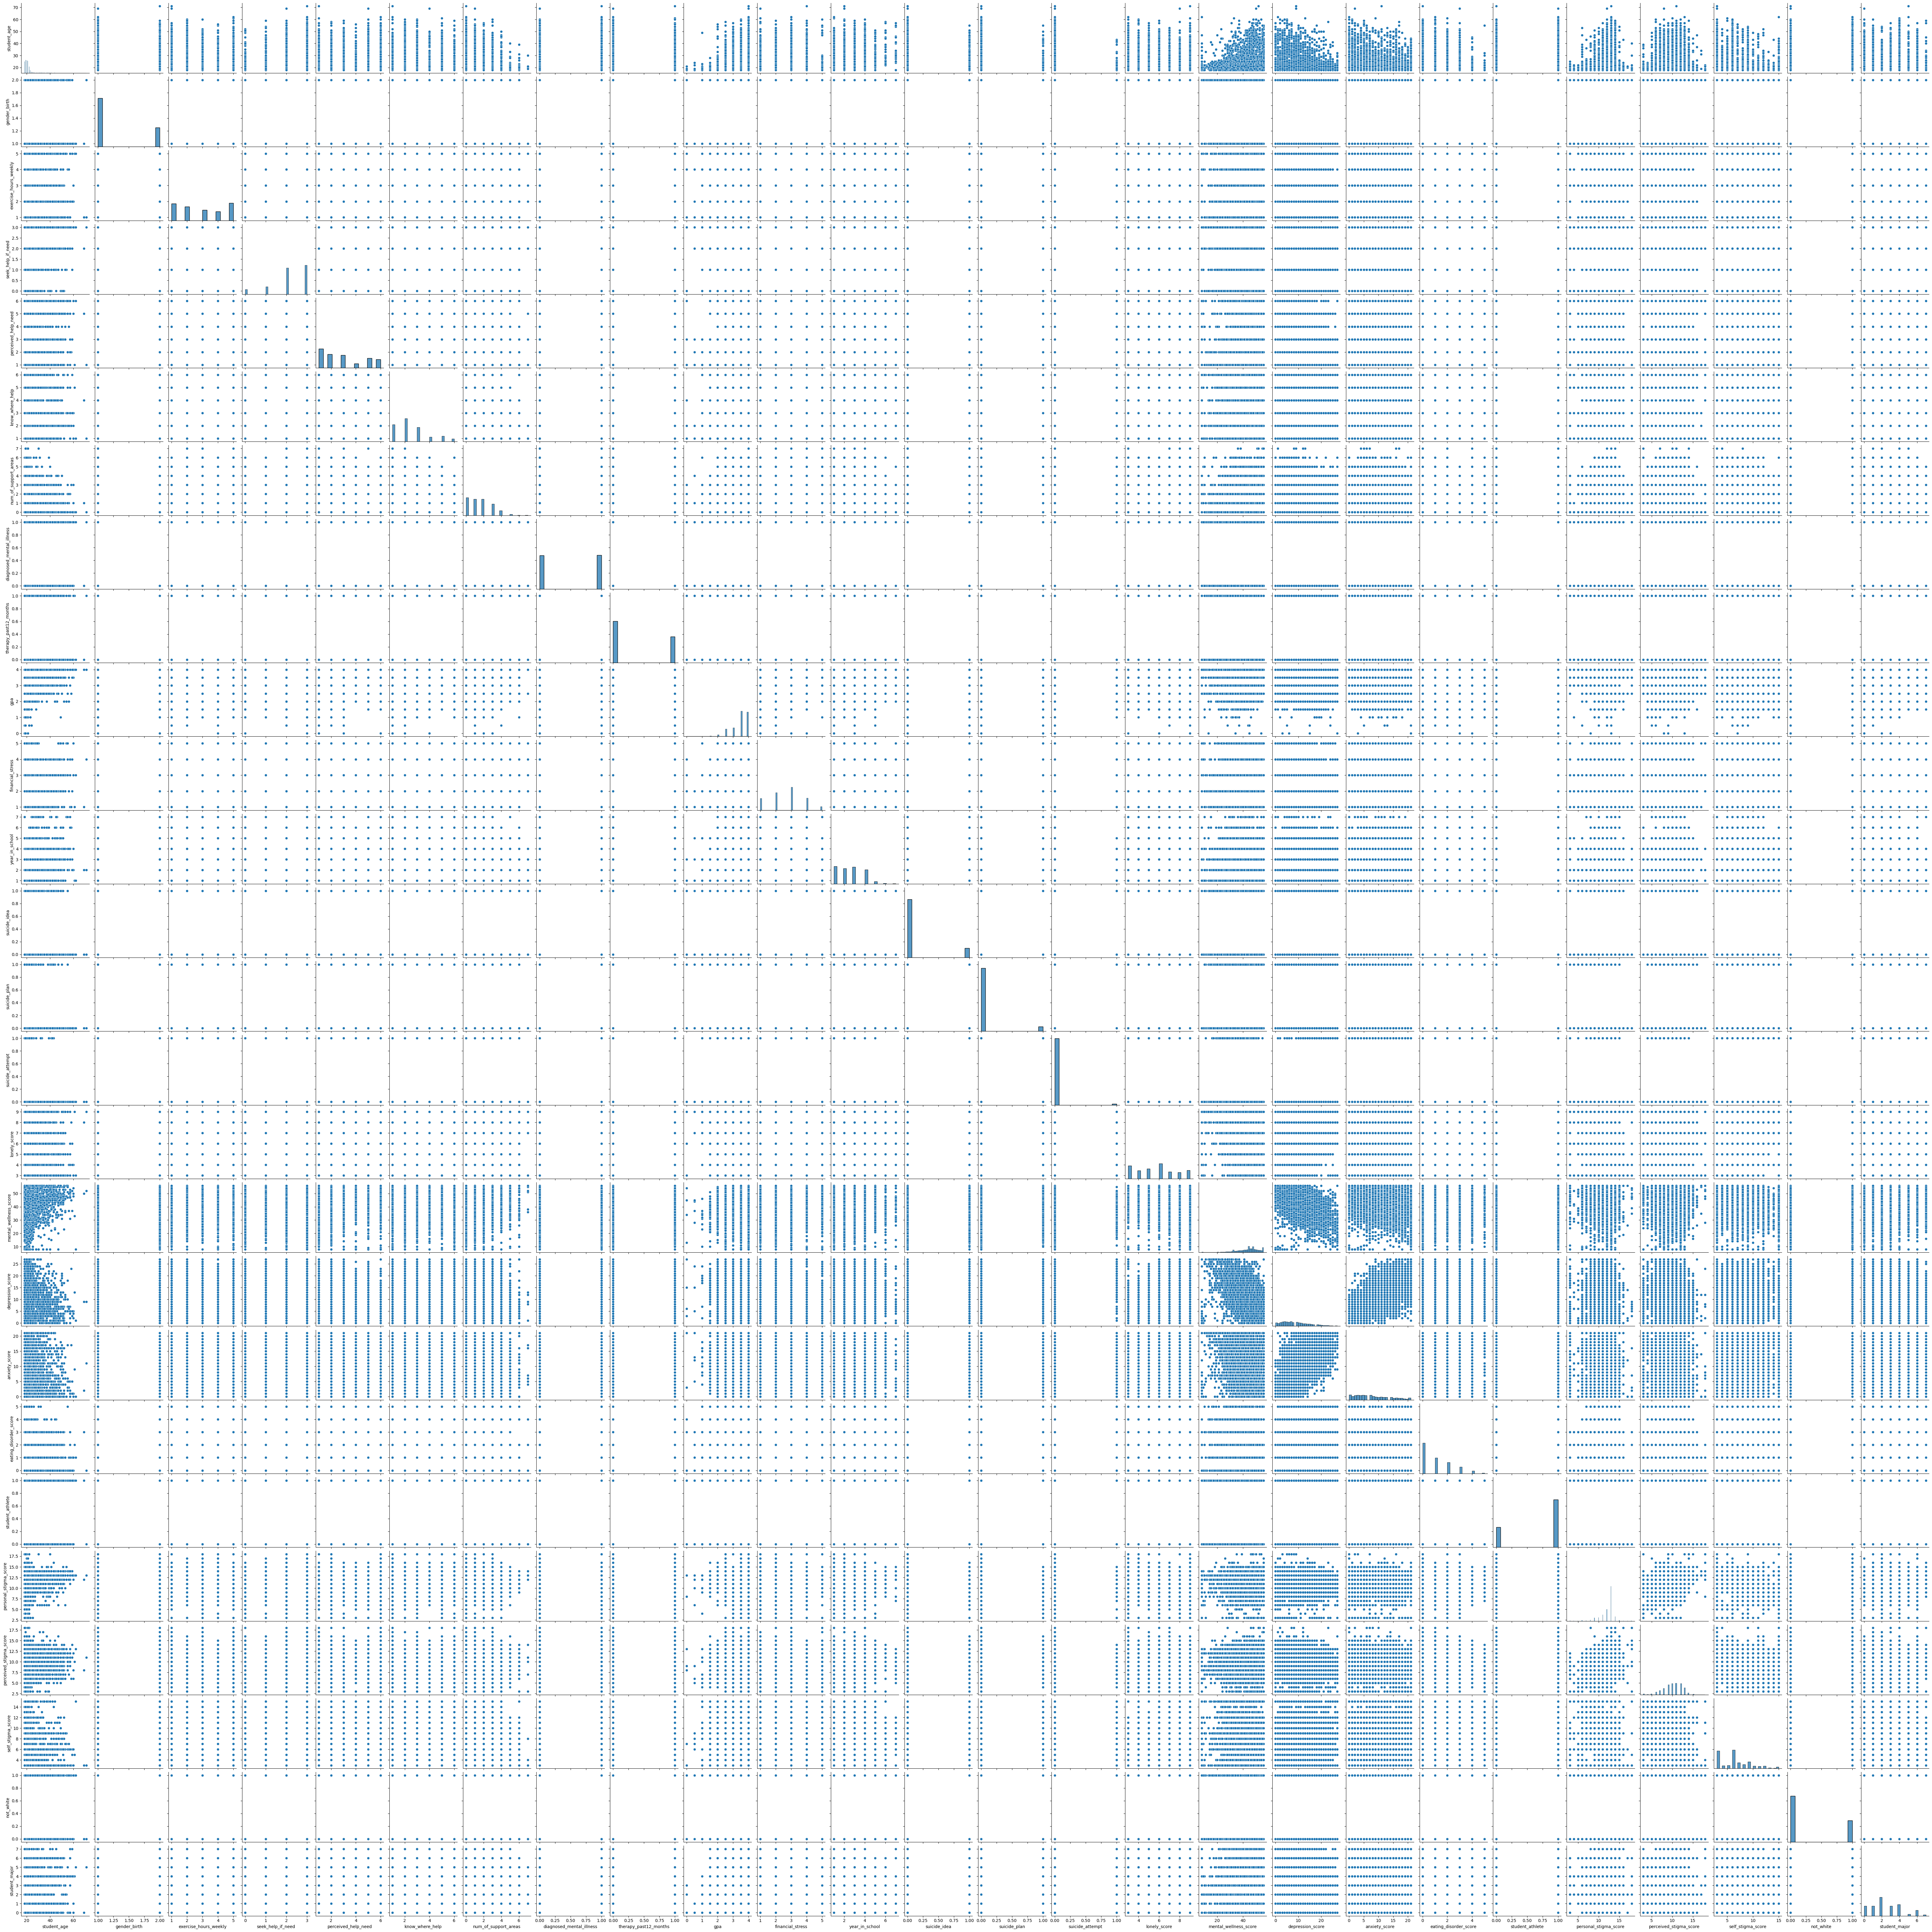

In [351]:
import seaborn as sns
sns.pairplot(kusto_hms)
plt.show()

### Look at how the predictors I may drop drop due to sigficance individually compare to the response

#### Potentially dropped predictors
Because p value greater than .05
Predictor,    P value with all the other predictors

- student_age, P value = 0.752
- num_of_support_areas, P value = 0.184
- year_in_school, P value = 0.836
- personal_stigma_score, P value = 0.416
- perceived_stigma_score, P value = 0.937
- not_white, P value = 0.090
- student_major, P value = 0.069
- suicide_attempt, P value = 0.105

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your dataframe is named kusto_hms
# Add constant to the predictors to account for the intercept in the model
X = sm.add_constant(kusto_hms.drop(['depression_score'], axis=1))

# Response variable
y = kusto_hms['depression_score']

# Calculate VIF for each feature (column) in X
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

                    Variable         VIF
0                      const  254.295837
1                student_age    1.220531
2               gender_birth    1.187913
3      exercise_hours_weekly    1.107078
4          seek_help_if_need    1.289037
5        perceived_help_need    2.049875
6            know_where_help    1.121239
7       num_of_support_areas    1.187220
8   diagnosed_mental_illness    1.574234
9      therapy_past12_months    1.594996
10                       gpa    1.115460
11          financial_stress    1.241195
12            year_in_school    1.139722
13              suicide_idea    1.709156
14              suicide_plan    1.684523
15           suicide_attempt    1.195829
16              lonely_score    1.712345
17     mental_wellness_score    1.694335
18             anxiety_score    1.837139
19     eating_disorder_score    1.226251
20           student_athlete    1.018331
21     personal_stigma_score    1.363734
22    perceived_stigma_score    1.249650
23         self_

In [601]:
potential_drop = ['student_age', 'num_of_support_areas', 'year_in_school','personal_stigma_score',
                 'perceived_stigma_score', 'not_white', 'student_major', 'suicide_attempt', 'gender_birth']

#also removing perceived stigma, personal stigma, and year in school because of how high the p value is
pred_to_drop = ['depression_score', 'perceived_stigma_score','year_in_school']
for predictor in potential_drop:
    pred_check = sm.add_constant(kusto_hms[[predictor]])
    model = sm.OLS(y, pred_check).fit()
    # print(model.summary())
    print(f'P-value for {predictor}: {model.pvalues[predictor]:.5f}')
    if model.pvalues[predictor] > 0.05:
        print(predictor, "dropped")
        pred_to_drop.append(predictor)

# Update predictors to keep only ones statistically significant
X = sm.add_constant(kusto_hms.drop(pred_to_drop,axis=1))

P-value for student_age: 0.07282
student_age dropped
P-value for num_of_support_areas: 0.00000
P-value for year_in_school: 0.00719
P-value for personal_stigma_score: 0.00012
P-value for perceived_stigma_score: 0.00000
P-value for not_white: 0.47222
not_white dropped
P-value for student_major: 0.00000
P-value for suicide_attempt: 0.00000
P-value for gender_birth: 0.00000


In [602]:
# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       depression_score   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     871.0
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:48:32   Log-Likelihood:                -20780.
No. Observations:                7838   AIC:                         4.160e+04
Df Residuals:                    7816   BIC:                         4.176e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Train the data set

In [604]:
from sklearn.model_selection import train_test_split

# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [605]:
X_train

const  gender_birth  exercise_hours_weekly  seek_help_if_need  \
6258    1.0           1.0                    5.0                0.0   
6358    1.0           1.0                    4.0                2.0   
4241    1.0           1.0                    1.0                2.0   
3316    1.0           1.0                    1.0                2.0   
4268    1.0           1.0                    4.0                2.0   
...     ...           ...                    ...                ...   
599     1.0           1.0                    5.0                3.0   
5695    1.0           2.0                    5.0                3.0   
1361    1.0           1.0                    2.0                2.0   
1547    1.0           1.0                    4.0                1.0   
4959    1.0           2.0                    5.0                2.0   

      perceived_help_need  know_where_help  num_of_support_areas  \
6258                  6.0              1.0                   0.0   
6358                  2.0              4.0                   2.0   
4241                  2.0              3.0                   2.0   
3316                  4.0              3.0                   3.0   
4268                  2.0              1.0                   1.0   
...                   ...              ...                   ...   
599                   2.0              2.0                   2.0   
5695                  5.0              1.0                   0.0   
1361                  1.0              3.0                   2.0   
1547                  3.0              1.0                   4.0   
4959                  5.0              3.0                   1.0   

      diagnosed_mental_illness  therapy_past12_months  gpa  ...  suicide_plan  \
6258                       1.0                    0.0  3.5  ...           1.0   
6358                       1.0                    0.0  4.0  ...           0.0   
4241                       0.0                    0.0  3.5  ...           0.0   
3316                       0.0                    0.0  3.5  ...           0.0   
4268                       0.0                    0.0  2.5  ...           0.0   
...                        ...                    ...  ...  ...           ...   
599                        1.0                    1.0  3.0  ...           0.0   
5695                       0.0                    0.0  4.0  ...           0.0   
1361                       1.0                    1.0  2.5  ...           0.0   
1547                       0.0                    1.0  4.0  ...           0.0   
4959                       0.0                    0.0  4.0  ...           0.0   

      suicide_attempt  lonely_score  mental_wellness_score  anxiety_score  \
6258              0.0           8.0                   37.0           17.0   
6358              0.0           8.0                   53.0           16.0   
4241              0.0           9.0                   37.0            6.0   
3316              0.0           7.0                   44.0           11.0   
4268              0.0           6.0                   47.0            5.0   
...               ...           ...                    ...            ...   
599               0.0           6.0                   44.0            5.0   
5695              0.0           8.0                   52.0            1.0   
1361              0.0           6.0                   44.0           13.0   
1547              0.0           3.0                   56.0            0.0   
4959              0.0           5.0                   52.0            0.0   

      eating_disorder_score  student_athlete  personal_stigma_score  \
6258                    1.0              0.0                   10.0   
6358                    0.0              1.0                   13.0   
4241                    2.0              1.0                   12.0   
3316                    1.0              0.0                   13.0   
4268                    1.0              1.0                   15.0   
...         

In [606]:
y_train

6258    20.0
6358     8.0
4241     8.0
3316    10.0
4268     6.0
        ... 
599      3.0
5695     0.0
1361     9.0
1547     0.0
4959     0.0
Name: depression_score, Length: 5878, dtype: float64

In [607]:
X_test

const  gender_birth  exercise_hours_weekly  seek_help_if_need  \
4247    1.0           1.0                    2.0                3.0   
7070    1.0           1.0                    1.0                2.0   
2678    1.0           1.0                    5.0                0.0   
4176    1.0           1.0                    4.0                3.0   
2604    1.0           2.0                    1.0                0.0   
...     ...           ...                    ...                ...   
536     1.0           1.0                    4.0                3.0   
6942    1.0           1.0                    3.0                2.0   
2408    1.0           1.0                    5.0                2.0   
5861    1.0           1.0                    5.0                2.0   
3313    1.0           1.0                    1.0                2.0   

      perceived_help_need  know_where_help  num_of_support_areas  \
4247                  3.0              5.0                   0.0   
7070                  1.0              1.0                   1.0   
2678                  5.0              1.0                   3.0   
4176                  2.0              1.0                   3.0   
2604                  3.0              3.0                   0.0   
...                   ...              ...                   ...   
536                   1.0              1.0                   3.0   
6942                  3.0              4.0                   2.0   
2408                  2.0              3.0                   2.0   
5861                  1.0              2.0                   3.0   
3313                  3.0              1.0                   0.0   

      diagnosed_mental_illness  therapy_past12_months  gpa  ...  suicide_plan  \
4247                       1.0                    0.0  4.0  ...           0.0   
7070                       1.0                    0.0  2.5  ...           0.0   
2678                       1.0                    0.0  3.0  ...           0.0   
4176                       0.0                    0.0  3.5  ...           1.0   
2604                       0.0                    0.0  3.0  ...           0.0   
...                        ...                    ...  ...  ...           ...   
536                        1.0                    0.0  4.0  ...           0.0   
6942                       1.0                    1.0  3.5  ...           0.0   
2408                       1.0                    0.0  3.5  ...           0.0   
5861                       1.0                    1.0  3.0  ...           0.0   
3313                       1.0                    1.0  3.0  ...           0.0   

      suicide_attempt  lonely_score  mental_wellness_score  anxiety_score  \
4247              0.0           5.0                   38.0           12.0   
7070              0.0           9.0                   37.0           12.0   
2678              0.0           7.0                   32.0           12.0   
4176              0.0           9.0                   55.0           16.0   
2604              0.0           9.0                   35.0            4.0   
...               ...           ...                    ...            ...   
536               0.0           5.0                   49.0            1.0   
6942              0.0           6.0                   36.0           11.0   
2408              0.0           9.0                   44.0           17.0   
5861              0.0           9.0                   46.0           16.0   
3313              0.0           8.0                   52.0            8.0   

      eating_disorder_score  student_athlete  personal_stigma_score  \
4247                    3.0              1.0                   13.0   
7070                    2.0              0.0                   13.0   
2678                    2.0              0.0                    9.0   
4176                    0.0              1.0                   13.0   
2604                    0.0              0.0                   13.0   
...         

In [608]:
y_test

4247    11.0
7070    11.0
2678    10.0
4176    13.0
2604     5.0
        ... 
536      2.0
6942    11.0
2408    17.0
5861    14.0
3313     9.0
Name: depression_score, Length: 1960, dtype: float64

#### Create a Model

In [610]:
from sklearn.linear_model import LinearRegression

In [611]:
model = LinearRegression()

In [622]:
model.fit(X_train,y_train)

LinearRegression()

In [624]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [626]:
test_predictions

array([12.23190475, 15.20584605, 12.30824612, ..., 15.60680796,
       14.0976478 ,  7.84632792])

In [628]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [630]:
MAE

2.619951139517719

In [632]:
MSE

11.321529726310432

In [634]:
RMSE

3.364748092548747

In [498]:
kusto_hms['depression_score'].mean()

8.961214595560092

### Plotting Residuals

Plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [501]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

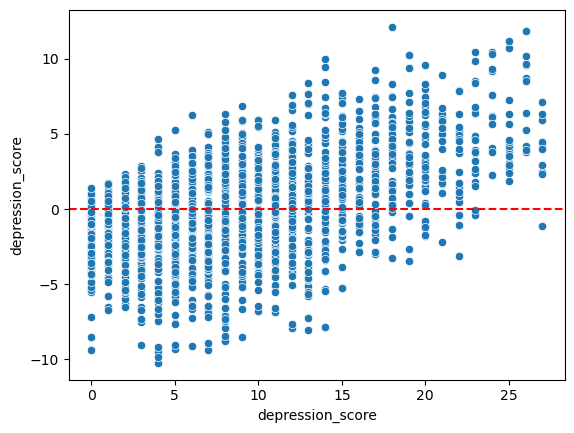

In [503]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [505]:
len(test_res)

1960

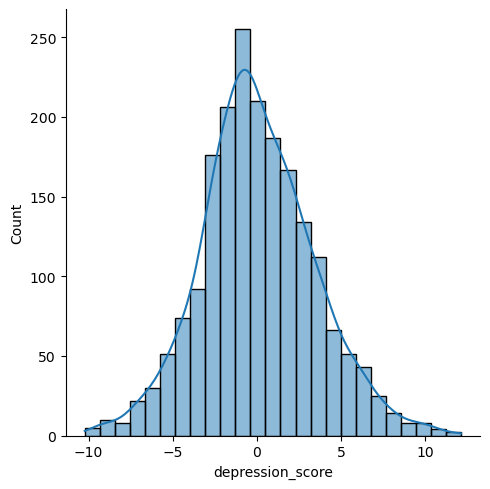

In [507]:
sns.displot(test_res,bins=25,kde=True)

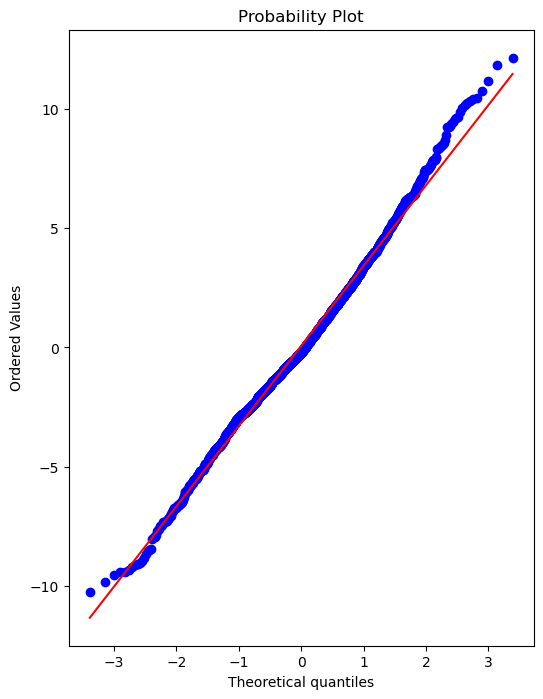

In [509]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

### Now make a another model but this one Polynomial Regression

In [512]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [514]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(7838, 275)

In [596]:
X.shape

(7838, 22)

In [518]:
X.iloc[0]

const                        1.0
gender_birth                 1.0
exercise_hours_weekly        5.0
seek_help_if_need            3.0
perceived_help_need          1.0
know_where_help              3.0
num_of_support_areas         3.0
diagnosed_mental_illness     1.0
therapy_past12_months        1.0
gpa                          3.5
financial_stress             2.0
suicide_idea                 0.0
suicide_plan                 0.0
suicide_attempt              0.0
lonely_score                 7.0
mental_wellness_score       42.0
anxiety_score                7.0
eating_disorder_score        4.0
student_athlete              1.0
personal_stigma_score       12.0
self_stigma_score            4.0
student_major                4.0
Name: 0, dtype: float64

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [521]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Model for fitting on Polynomial Data

#### Create an instance of the model with parameters

In [524]:
model_poly = LinearRegression(fit_intercept=True)

### Fit/Train the model on training data

In [527]:
model_poly.fit(X_train,y_train)

LinearRegression()

#### Calculate the model

In [530]:
test_predictions = model_poly.predict(X_test)

In [532]:
MAE_poly = mean_absolute_error(y_test,test_predictions)
MSE_poly = mean_squared_error(y_test,test_predictions)
RMSE_poly = np.sqrt(MSE_poly)

In [534]:
print('MAE',MAE,'MAE_poly',MAE_poly)

MAE 2.619951139517719 MAE_poly 2.6421342230883478


In [536]:
print('MSE',MSE,'MSE_poly',MSE_poly)

MSE 11.321529726310432 MSE_poly 11.725030151277924


In [538]:
print('RMSE',RMSE,'RMSE_poly',RMSE_poly)

RMSE 3.364748092548747 RMSE_poly 3.424183136352074


In [540]:
kusto_hms['depression_score'].mean()

8.961214595560092

In [542]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,5):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model_poly = LinearRegression(fit_intercept=True)
    model_poly.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model_poly.predict(X_train)
    test_pred = model_poly.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [543]:
print(train_rmse_errors,test_rmse_errors)

[3.43479548812345, 3.295298644967036, 2.694347500628986, 2.7800891936250157e-10] [3.4193737289115345, 3.424183136352074, 20043.72580556386, 34.906255313906776]


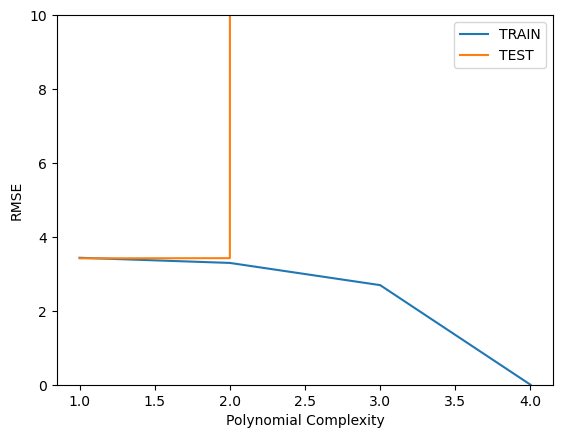

In [544]:
plt.plot(range(1,5),train_rmse_errors,label='TRAIN')
plt.plot(range(1,5),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,10)
plt.legend()

### Polynomial regression slightly performed worse than Linear Regression, but now we're going to try with L1 and L2
Degree of 2 was the best performer

In [546]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [547]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Ridge Regression

In [549]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)

test_predictions_ridge = ridge_model.predict(X_test)

In [550]:
MAE_ridge = mean_absolute_error(y_test,test_predictions)
MSE_ridge = mean_squared_error(y_test,test_predictions)
RMSE_ridge = np.sqrt(MSE_ridge)

In [551]:
MAE_ridge

2.6421342230883478

In [552]:
MSE_ridge

11.725030151277924

In [553]:
RMSE_ridge

3.424183136352074

In [554]:
# Training Set Performance
train_predictions_ridge = ridge_model.predict(X_train)
MAE_ridge = mean_absolute_error(y_train,train_predictions_ridge)
MAE_ridge

1.53707641955752

In [555]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [556]:
ridge_cv_model.alpha_


10.0

#### It chose alpha 10 so can't improve this ridge model

#### Now to test with Lasso

In [559]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)
lasso_cv_model.alpha_

0.478920147659982

### Test prediction results after getting the best alpha Value

In [561]:
test_predictions_lasso = lasso_cv_model.predict(X_test)

In [562]:
MAE_lasso = mean_absolute_error(y_test,test_predictions)
MSE_lasso = mean_squared_error(y_test,test_predictions)
RMSE_lasso = np.sqrt(MSE_lasso)

In [563]:
MAE_lasso

2.6421342230883478

In [564]:
MSE_lasso

11.725030151277924

In [565]:
RMSE_lasso

3.424183136352074

#### This values are further off than linear regression model

#### So I'm gonna stick to the linear regression model

In [590]:
X.iloc[0]

const                        1.0
gender_birth                 1.0
exercise_hours_weekly        5.0
seek_help_if_need            3.0
perceived_help_need          1.0
know_where_help              3.0
num_of_support_areas         3.0
diagnosed_mental_illness     1.0
therapy_past12_months        1.0
gpa                          3.5
financial_stress             2.0
suicide_idea                 0.0
suicide_plan                 0.0
suicide_attempt              0.0
lonely_score                 7.0
mental_wellness_score       42.0
anxiety_score                7.0
eating_disorder_score        4.0
student_athlete              1.0
personal_stigma_score       12.0
self_stigma_score            4.0
student_major                4.0
Name: 0, dtype: float64

In [690]:
model.predict([X_test.iloc[11]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.85127127])

In [692]:
y_test.iloc[11]

2.0

In [ ]:
# Boxplot for checking outliers in 'depression_score'
sns.boxplot(x=kusto_hms['depression_score'])
plt.show()

In [ ]:
# Scatter plot to check for any patterns or outliers
sns.scatterplot( )
plt.show()